In [78]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from datetime import timedelta


In [79]:

# CONFIG VISUAL
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="mako", font_scale=1.1)

# =====================================
# 1️⃣ CARGA DE DATOS
# =====================================

# Ruta a tus archivos JSON
json_files = glob.glob('C:\\Spotify\\Analisis-Spotify-Data\\Spotify Extended Streaming History\\Streaming_History_Audio_*.json')

# Leer y combinar todos los archivos
data = []
for file in json_files:
    with open(file, 'r', encoding='utf-8') as f:
        data.extend(json.load(f))

df = pd.DataFrame(data)

# =====================================
# 2️⃣ LIMPIEZA Y PREPARACIÓN
# =====================================

df['ts'] = pd.to_datetime(df['ts'])
df['minutes_played'] = df['ms_played'] / 60000
df = df[df['minutes_played'] > 0.5].reset_index(drop=True)

df['date'] = df['ts'].dt.date
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['day'] = df['ts'].dt.day
df['hour'] = df['ts'].dt.hour
df['weekday'] = df['ts'].dt.day_name()


In [80]:


# =====================================
# 9️⃣ SESIONES DE ESCUCHA
# =====================================

df = df.sort_values('ts').reset_index(drop=True)
df['time_diff'] = df['ts'].diff().fillna(pd.Timedelta(seconds=0))
df['new_session'] = df['time_diff'] > timedelta(minutes=30)
df['session_id'] = df['new_session'].cumsum()

sessions = (
    df.groupby('session_id')['minutes_played']
      .sum()
      .reset_index()
)
print(f"🎧 Total de sesiones: {len(sessions)}")
print(f"Duración promedio de sesión: {sessions['minutes_played'].mean():.2f} minutos")


🎧 Total de sesiones: 4079
Duración promedio de sesión: 28.25 minutos


C:\Users\Yo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9201 (\N{STOPWATCH}) missing from current font.

C:\Users\Yo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.



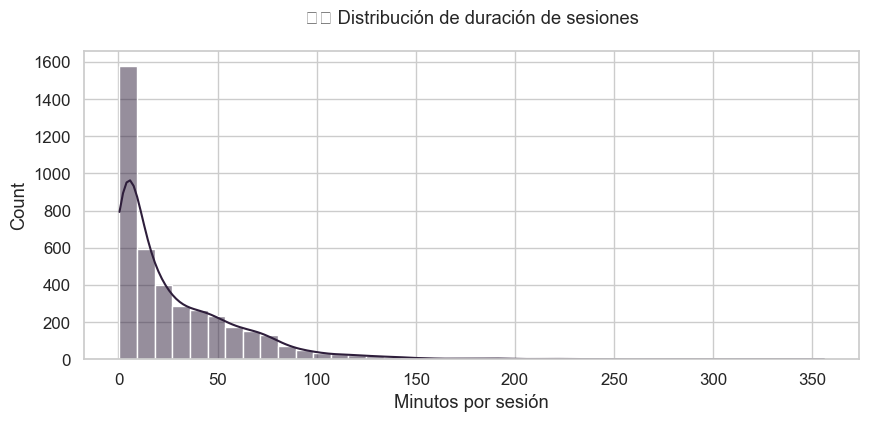

C:\Users\Yo\AppData\Local\Temp\ipykernel_20868\3271428803.py:16: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Yo\AppData\Local\Temp\ipykernel_20868\3271428803.py:29: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from current font.

C:\Users\Yo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from current font.



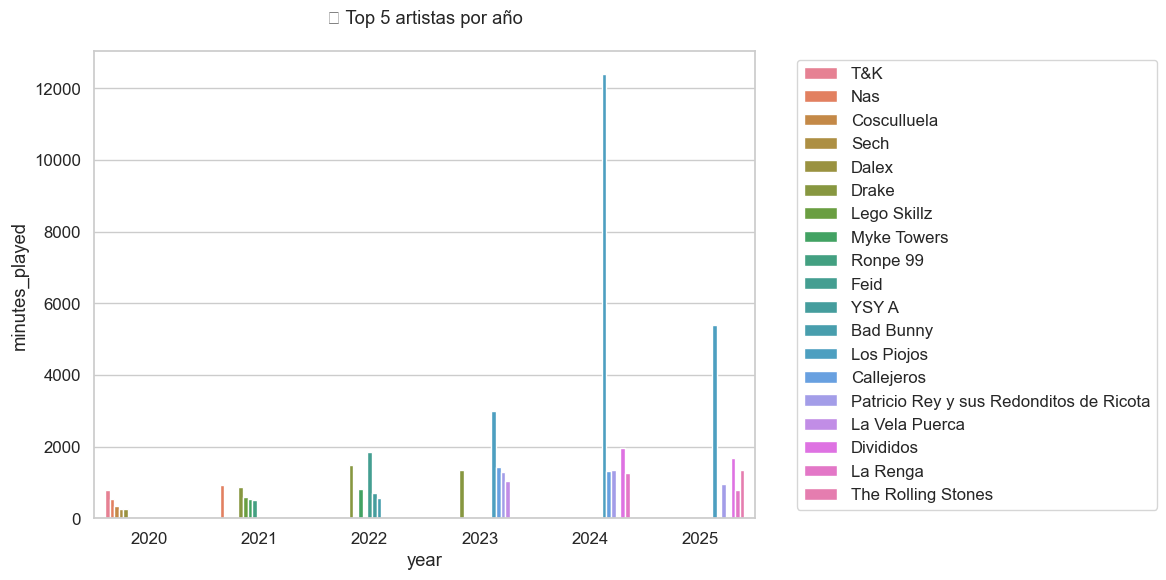

C:\Users\Yo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9729 (\N{CLOUD}) missing from current font.

C:\Users\Yo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.



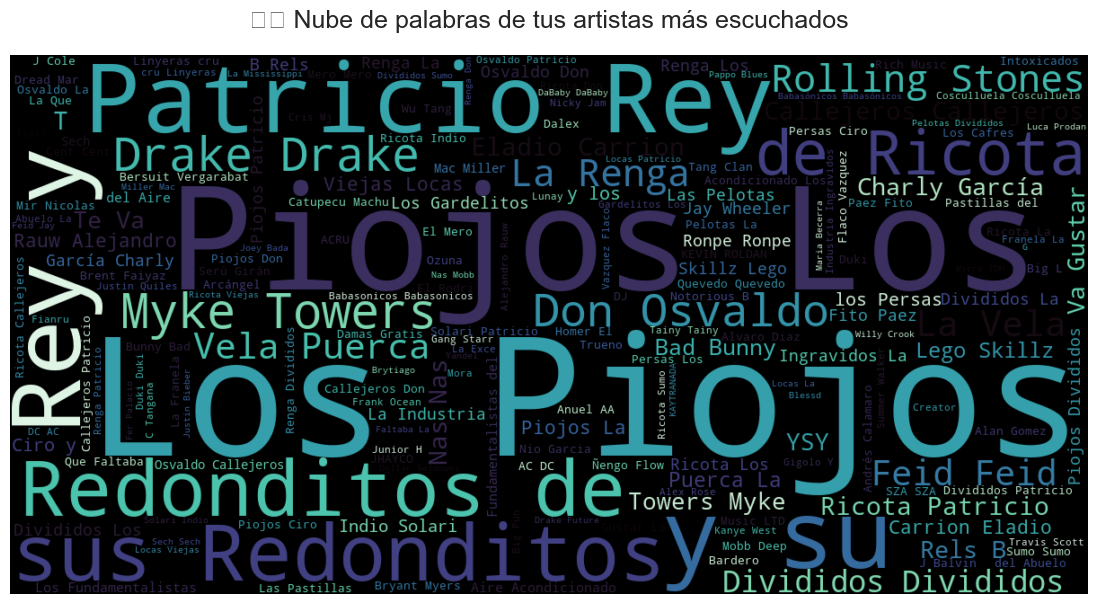

In [81]:

plt.figure(figsize=(10,4))
sns.histplot(sessions['minutes_played'], bins=40, kde=True)
plt.title('⏱️ Distribución de duración de sesiones')
plt.xlabel('Minutos por sesión')
plt.show()

# =====================================
# 🔟 EVOLUCIÓN DE TUS TOP ARTISTAS AÑO A AÑO
# =====================================

top_artists_year = (
    df.groupby(['year', 'master_metadata_album_artist_name'])['minutes_played']
      .sum().reset_index()
)

top_artists_year = top_artists_year.groupby('year').apply(
    lambda x: x.sort_values('minutes_played', ascending=False).head(5)
).reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_artists_year,
    x='year',
    y='minutes_played',
    hue='master_metadata_album_artist_name'
)
plt.title('🏆 Top 5 artistas por año')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# =====================================
# 🧠 BONUS: WORDCLOUD DE ARTISTAS
# =====================================

from wordcloud import WordCloud

text = " ".join(artist for artist in df['master_metadata_album_artist_name'].dropna())
wordcloud = WordCloud(width=1200, height=600, background_color="black", colormap="mako").generate(text)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("☁️ Nube de palabras de tus artistas más escuchados", fontsize=18)
plt.show()



In [82]:
# =====================================================
# 🌌 TU HISTORIA EN SPOTIFY - NOTEBOOK ANALÍTICA
# =====================================================

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import glob
from datetime import datetime

# -----------------------------------------------------
# 🎧 CARGA DE DATOS
# -----------------------------------------------------
json_files = glob.glob('C:\\Spotify\\Analisis-Spotify-Data\\Spotify Extended Streaming History\\Streaming_History_Audio_*.json')

data = []
for file in json_files:
    with open(file, 'r', encoding='utf-8') as f:
        data.extend(json.load(f))

df = pd.DataFrame(data)

# -----------------------------------------------------
# 🧹 LIMPIEZA Y FEATURE ENGINEERING
# -----------------------------------------------------
df['ts'] = pd.to_datetime(df['ts'])
df['minutes_played'] = df['ms_played'] / 60000
df = df[df['minutes_played'] > 0.5].reset_index(drop=True)

df['date'] = df['ts'].dt.date
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.to_period('M').astype(str)
df['hour'] = df['ts'].dt.hour
df['weekday'] = df['ts'].dt.day_name()

# -----------------------------------------------------
# 🎨 CONFIGURACIÓN ESTÉTICA GENERAL
# -----------------------------------------------------
plt.style.use('dark_background')
sns.set_theme(style="whitegrid", palette="mako")
primary_color = "#1DB954"  # verde Spotify

# -----------------------------------------------------
# 📊 MINUTOS ESCUCHADOS POR MES
# -----------------------------------------------------
monthly = (
    df.groupby('month')['minutes_played']
      .sum()
      .reset_index()
      .sort_values('month')
)

fig = px.line(
    monthly, x='month', y='minutes_played',
    title='⏱️ Minutos escuchados por mes',
    line_shape='spline', markers=True,
    template='plotly_dark', color_discrete_sequence=[primary_color]
)
fig.update_traces(line=dict(width=3))
fig.show()


C:\Users\Yo\AppData\Local\Temp\ipykernel_20868\3062897029.py:36: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [83]:

# -----------------------------------------------------
# ✨ MOMENTOS PERSONALES (añadí tus eventos)
# -----------------------------------------------------

# ⚠️ PERSONALIZÁ ESTOS EVENTOS:
life_events = {
    "2020-03-15": "Inicio pandemia",
    "2021-12-10": "Fin cursada Algoritmos I",
    "2022-07-20": "Vacaciones invierno",
    "2023-03-05": "Nuevo laburo / etapa"
}

monthly = (
    df.groupby(pd.Grouper(key='ts', freq='M'))['minutes_played']
      .sum()
      .reset_index()
      .sort_values('ts')
)
monthly['month'] = monthly['ts'].dt.to_period('M').astype(str)

# Convertimos las fechas de eventos también
life_events_dt = {pd.to_datetime(k): v for k, v in life_events.items()}


# ---
# 🎨 Creamos la figura con el cambio en el eje X
# ---
fig2 = go.Figure()

# ... (código que prepara monthly y define fig2)

fig2.add_trace(go.Scatter(
    x=monthly['ts'], y=monthly['minutes_played'],
    mode='lines+markers',
    line=dict(color=primary_color, width=3),
    name="Minutos escuchados"
))

for date, event in life_events.items():
    # 1. Convertir el string de fecha a Timestamp (naive)
    event_ts_naive = pd.to_datetime(date)
    
    # 2. Localizar la zona horaria a UTC (debe coincidir con monthly['ts'])
    event_ts_utc = event_ts_naive.tz_localize('UTC')
    
    # 3. CONVERTIMOS a milisegundos desde la época (Unix timestamp)
    # Plotly a menudo prefiere este formato numérico para fechas complejas.
    # El 10**9 convierte nanosegundos a segundos. El * 1000 convierte a milisegundos.
    event_timestamp_ms = event_ts_utc.value / 10**6 # O / 1_000_000.0
    
    fig2.add_vline(
        # ✅ CAMBIO CLAVE AQUÍ: Pasamos el valor numérico (milisegundos)
        x=event_timestamp_ms, 
        line_dash="dot",
        line_color="white",
        annotation_text=event,
        annotation_position="top right",
        opacity=0.7
    )

fig2.update_layout(
    template="plotly_dark",
    title="📅 Mi línea temporal musical con momentos personales",
    xaxis_title="Fecha",
    yaxis_title="Minutos escuchados",
)
fig2.show()

C:\Users\Yo\AppData\Local\Temp\ipykernel_20868\56539351.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Yo\AppData\Local\Temp\ipykernel_20868\56539351.py:19: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



C:\Users\Yo\AppData\Local\Temp\ipykernel_20868\1844935937.py:47: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



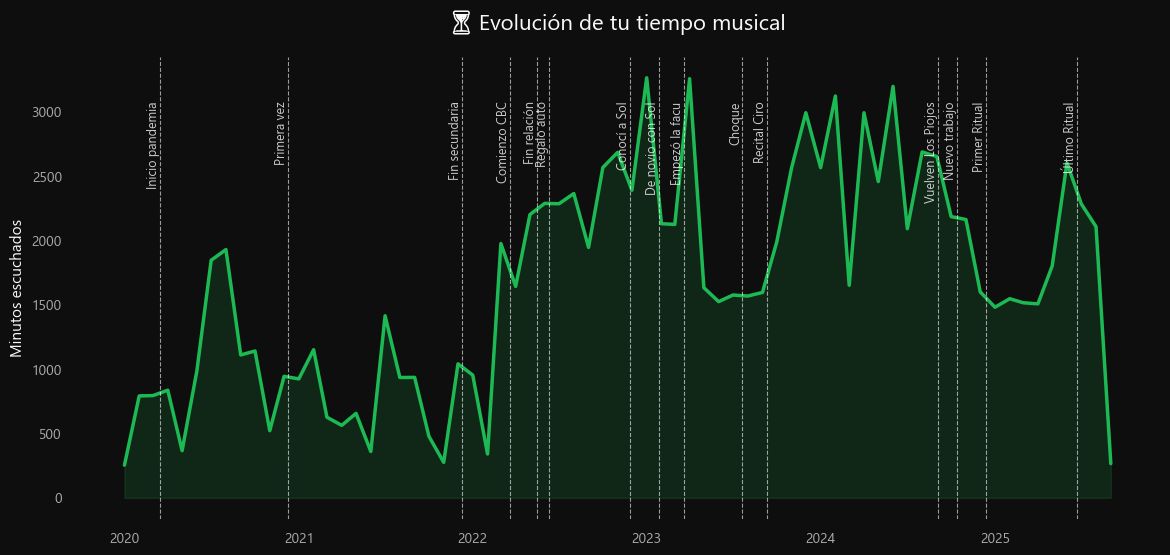

C:\Users\Yo\AppData\Local\Temp\ipykernel_20868\1844935937.py:95: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



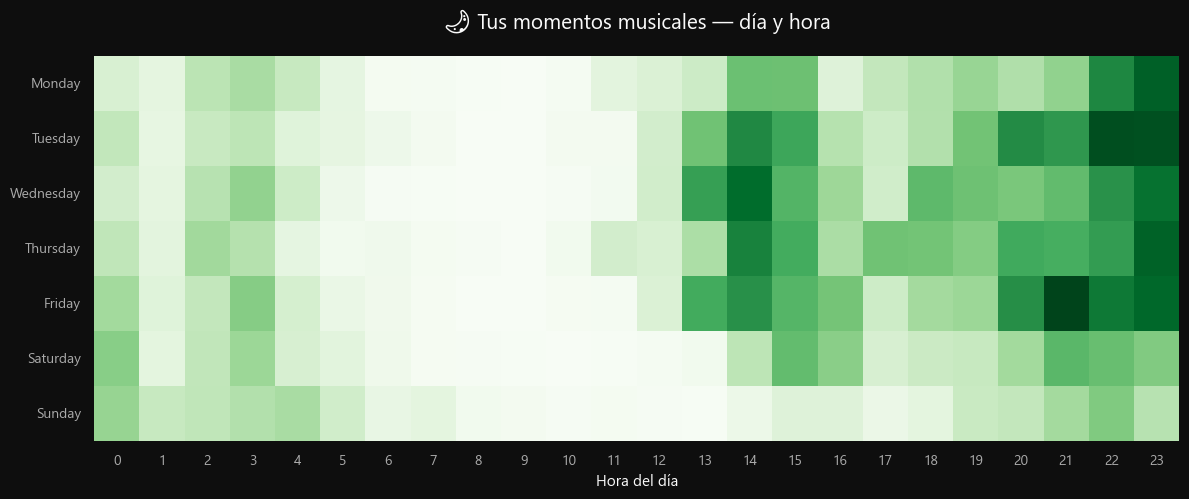

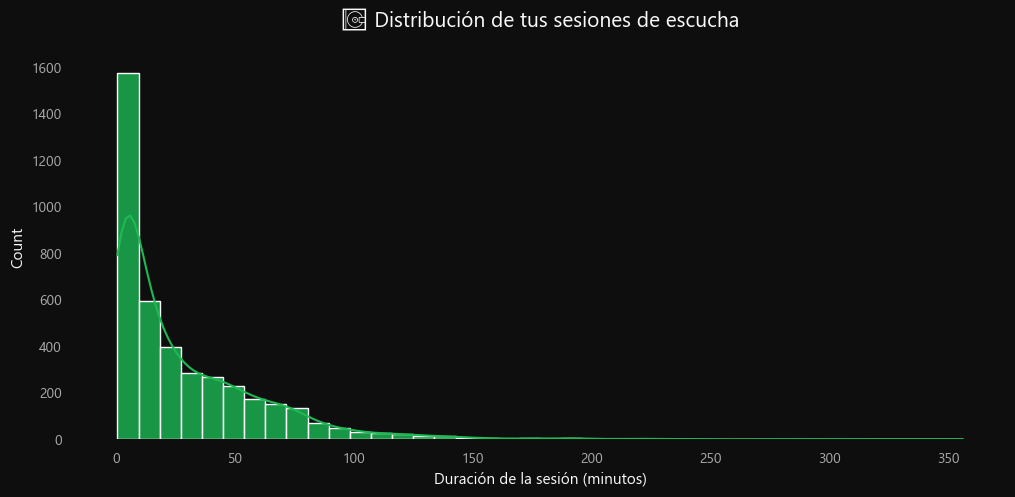

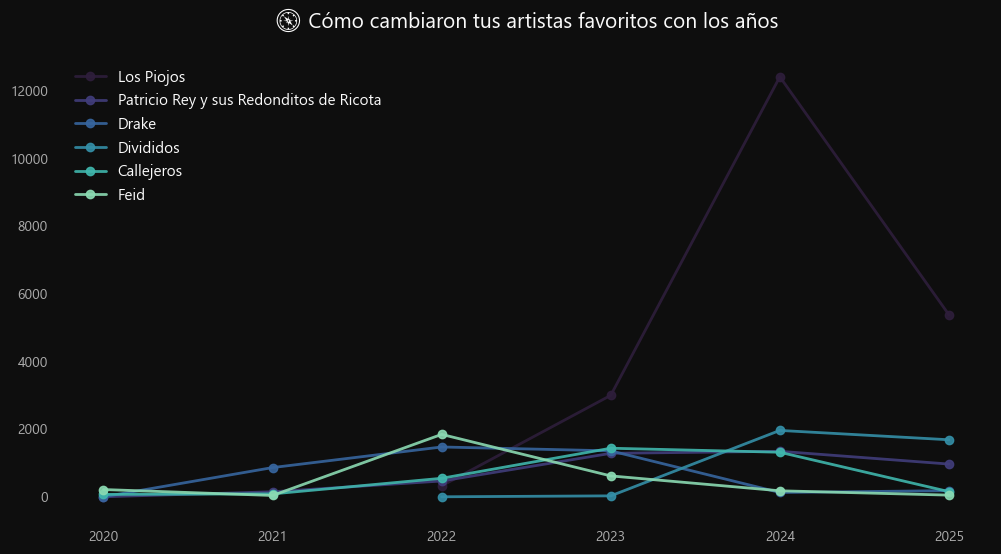

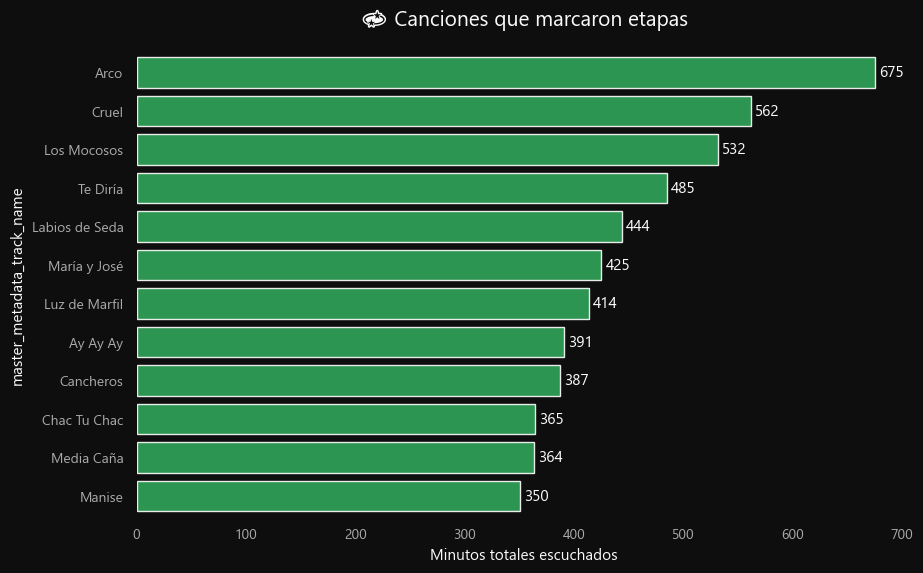

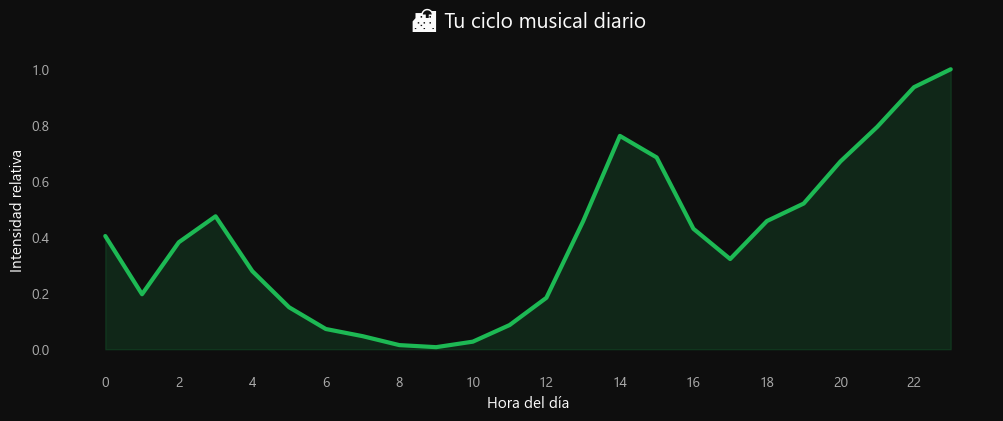

In [ ]:
# =====================================================
# 🌌 HISTORIA VISUAL DE TU SPOTIFY
# Estética minimalista y narrativa
# =====================================================

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# -----------------------------------------------------
# CONFIGURACIÓN ESTÉTICA
# -----------------------------------------------------

# Paleta inspirada en Spotify + neón tenue
ACCENT = "#1DB954"
BG = "#0E0E0E"
TEXT = "#FAFAFA"
SUBTLE = "#2A2A2A"

sns.set_style("white")
plt.rcParams.update({
    "axes.facecolor": BG,
    "figure.facecolor": BG,
    "axes.edgecolor": BG,
    "axes.labelcolor": TEXT,
    "xtick.color": "#AAAAAA",
    "ytick.color": "#AAAAAA",
    "text.color": TEXT,
    "axes.titlepad": 20,
    "font.size": 11,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "grid.color": "#222222",
})

plt.rcParams['font.family'] = 'Segoe UI Emoji'

# -----------------------------------------------------
# 🎼 1. Evolución mensual como escena cinematográfica
# -----------------------------------------------------

monthly = (
    df.groupby(df['ts'].dt.to_period('M'))['minutes_played']
      .sum().reset_index()
)
monthly['month'] = monthly['ts'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(monthly['month'], monthly['minutes_played'], color=ACCENT, lw=2.5)
ax.fill_between(monthly['month'], monthly['minutes_played'], color=ACCENT, alpha=0.15)
ax.set_title("⏳ Evolución de tu tiempo musical", fontsize=16, fontweight='bold', color=TEXT)
ax.set_ylabel("Minutos escuchados")
ax.set_xlabel("")
sns.despine(left=True, bottom=True)

# --- momentos personales (añadí los tuyos acá)
life_events = {
    "2020-03-15": "Inicio pandemia",
    "2020-12-09": "Primera vez",
    "2021-12-10": "Fin secundaria",
    "2022-03-21": "Comienzo CBC",
    "2022-05-15": "Fin relación",
    "2022-06-11": "Regalo auto",
    "2022-11-27": "Conocí a Sol",
    "2023-01-27": "De novio con Sol",
    "2023-03-21": "Empezó la facu",
    "2023-07-20": "Choque",
    "2023-09-10": "Recital Ciro",
    "2024-09-04": "Vuelven Los Piojos",
    "2024-10-14": "Nuevo trabajo",
    "2024-12-14": "Primer Ritual",
    "2025-06-22": "Último Ritual"
}
for date, label in life_events.items():
    d = pd.to_datetime(date)
    ax.axvline(d, color=TEXT, ls="--", lw=0.8, alpha=0.6)
    ax.text(d, ax.get_ylim()[1]*0.9, label, rotation=90, va="top", ha="right", fontsize=9, alpha=0.8)
plt.show()

# -----------------------------------------------------
# 🕰️ 2. Ritmo circadiano: heatmap horario con estética minimal
# -----------------------------------------------------
df['weekday'] = pd.Categorical(
    df['ts'].dt.day_name(),
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    ordered=True
)
df['hour'] = df['ts'].dt.hour

pivot = df.groupby(['weekday','hour'])['minutes_played'].sum().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(14,5))
sns.heatmap(pivot, cmap="Greens", cbar=False, ax=ax)
ax.set_title("🌙 Tus momentos musicales — día y hora", fontsize=15, weight="bold", color=TEXT)
ax.set_xlabel("Hora del día")
ax.set_ylabel("")
sns.despine(left=True, bottom=True)
plt.show()

# -----------------------------------------------------
# 🧠 3. Sesiones de escucha: energía y dispersión
# -----------------------------------------------------
df = df.sort_values('ts')
df['diff'] = df['ts'].diff()
df['new_session'] = df['diff'] > pd.Timedelta(minutes=30)
df['session_id'] = df['new_session'].cumsum()
sessions = df.groupby('session_id')['minutes_played'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(sessions['minutes_played'], bins=40, color=ACCENT, kde=True, alpha=0.8)
ax.set_title("💽 Distribución de tus sesiones de escucha", fontsize=15, weight="bold")
ax.set_xlabel("Duración de la sesión (minutos)")
sns.despine(left=True, bottom=True)
plt.show()

# -----------------------------------------------------
# 🧑‍🎤 4. Trayectorias de artistas — evolución afectiva
# -----------------------------------------------------
artist_time = (
    df.groupby(['year', 'master_metadata_album_artist_name'])['minutes_played']
      .sum().reset_index()
)
top_artists = artist_time.groupby('master_metadata_album_artist_name')['minutes_played'].sum().nlargest(6).index
artist_subset = artist_time[artist_time['master_metadata_album_artist_name'].isin(top_artists)]

fig, ax = plt.subplots(figsize=(12,6))
for artist in top_artists:
    data = artist_subset[artist_subset['master_metadata_album_artist_name']==artist]
    ax.plot(data['year'], data['minutes_played'], marker='o', lw=2, label=artist, alpha=0.9)

ax.set_title("🧭 Cómo cambiaron tus artistas favoritos con los años", fontsize=15, weight="bold")
ax.legend(facecolor=BG, edgecolor=BG, labelcolor=TEXT)
sns.despine(left=True, bottom=True)
plt.show()

# -----------------------------------------------------
# 🎶 5. Canciones que definieron tu historia
# -----------------------------------------------------
tracks = (
    df.groupby('master_metadata_track_name')['minutes_played']
      .sum().sort_values(ascending=False).head(12)
)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=tracks.values, y=tracks.index, color=ACCENT, ax=ax, alpha=0.9)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', padding=3, color=TEXT)
ax.set_title("💫 Canciones que marcaron etapas", fontsize=15, weight="bold")
ax.set_xlabel("Minutos totales escuchados")
sns.despine(left=True, bottom=True)
plt.show()

# -----------------------------------------------------
# 🌈 6. Moodboard visual: día típico musical
# -----------------------------------------------------
day_cycle = df.groupby('hour')['minutes_played'].sum().reset_index()
day_cycle['normalized'] = day_cycle['minutes_played'] / day_cycle['minutes_played'].max()

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(day_cycle['hour'], day_cycle['normalized'], color=ACCENT, lw=3)
ax.fill_between(day_cycle['hour'], day_cycle['normalized'], color=ACCENT, alpha=0.15)
ax.set_xticks(range(0,24,2))
ax.set_title("🌇 Tu ciclo musical diario", fontsize=15, weight="bold")
ax.set_xlabel("Hora del día")
ax.set_ylabel("Intensidad relativa")
sns.despine(left=True, bottom=True)
plt.show()


In [85]:
# Evolución de escucha de la banda "Los Piojos"
los_piojos = df[df['master_metadata_album_artist_name'] == 'Los Piojos']    
piojos_monthly = (
    los_piojos.groupby(los_piojos['ts'].dt.to_period('M'))['minutes_played']
      .sum().reset_index()
)

piojos_monthly = piojos_monthly[piojos_monthly['minutes_played'] > 5]

piojos_monthly['month'] = piojos_monthly['ts'].dt.to_timestamp()

C:\Users\Yo\AppData\Local\Temp\ipykernel_20868\3754857965.py:4: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



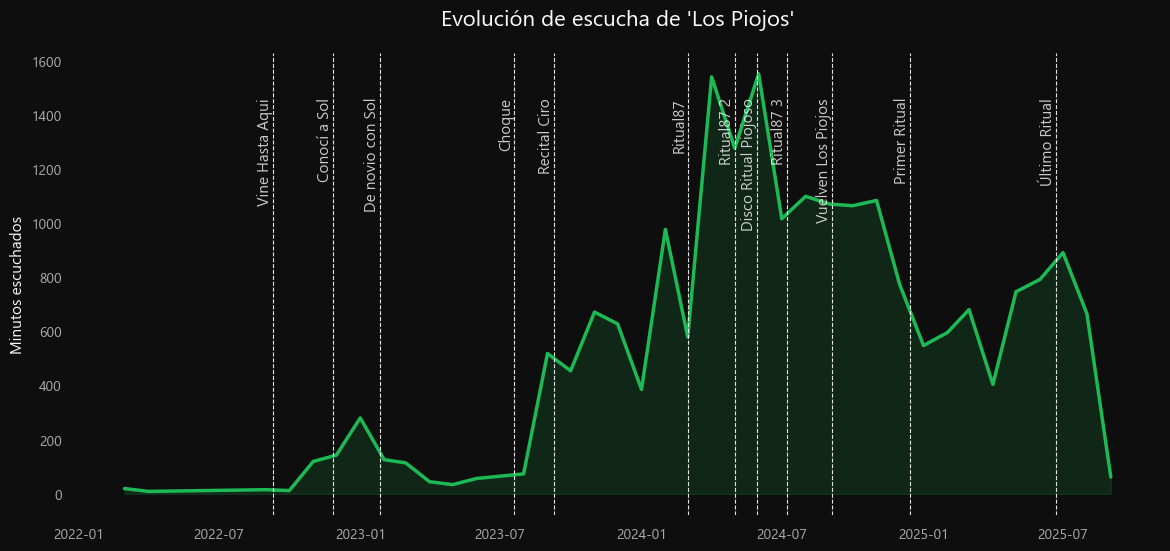

In [103]:
# --- momentos personales (añadí los tuyos acá)
life_events = {
    "2022-09-10": "Vine Hasta Aqui",
    "2022-11-27": "Conocí a Sol",
    "2023-01-27": "De novio con Sol",
    "2023-07-20": "Choque",
    "2023-09-10": "Recital Ciro",
    "2024-03-01": "Ritual87",
    "2024-05-01": "Ritual87 2",
    "2024-05-30": "Disco Ritual Piojoso",
    "2024-07-08": "Ritual87 3",
    "2024-09-04": "Vuelven Los Piojos",
    "2024-12-14": "Primer Ritual",
    "2025-06-22": "Último Ritual"
}

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(piojos_monthly['month'], piojos_monthly['minutes_played'], color=ACCENT, lw=2.5)
ax.fill_between(piojos_monthly['month'], piojos_monthly['minutes_played'], color=ACCENT, alpha=0.15)
ax.set_title("Evolución de escucha de 'Los Piojos'", fontsize=16, fontweight='bold', color=TEXT)
ax.set_ylabel("Minutos escuchados")
ax.set_xlabel("")
sns.despine(left=True, bottom=True)

# trazar líneas verticales para eventos personales
from datetime import datetime

# Filtrar eventos desde agosto 2022 en adelante
cutoff = datetime(2022, 8, 1)
filtered_life_events = {date: label for date, label in life_events.items() if pd.to_datetime(date) >= cutoff}

for date, label in filtered_life_events.items():
    d = pd.to_datetime(date)
    ax.axvline(d, color=TEXT, ls="--", lw=0.8, alpha=0.9)
    ax.text(d, ax.get_ylim()[1]*0.9, label, rotation=90, va="top", ha="right", fontsize=11, alpha=0.8)

plt.show()
